# **Install required library**

In [58]:
! pip install nilearn

# **Load cleaned fMRI data**

**Masker objects can transform both 3D and 4D image objects. Transforming a 4D image produces a 2D (samples x features) matrix.**

Reference: From neuroimaging volumes to data matrices(
https://nilearn.github.io/stable/manipulating_images/masker_objects.html?highlight=niftilabelsmasker)

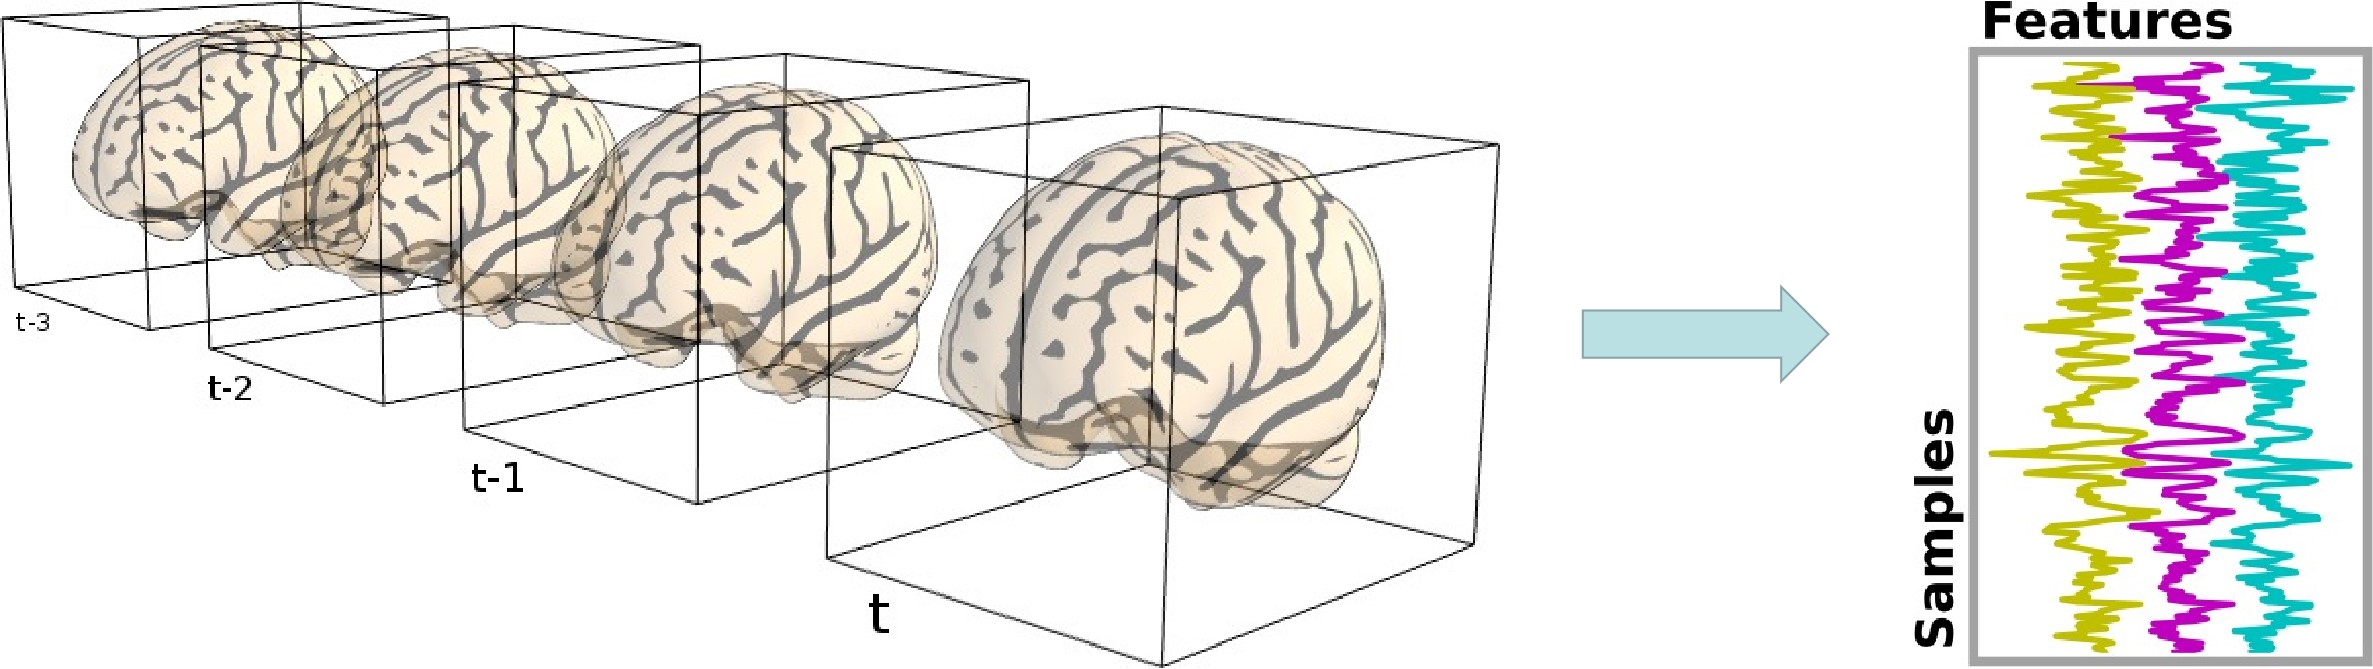

## **Retrieve data**

In [59]:
# # # data_path='xx.nii.gz'
# # from google.colab import files
# # files.upload()

# import os
# from google.colab import drive
# drive.mount('/content/drive')

# path = "/content/drive/MyDrive/Colab/data"

# os.chdir(path)
# os.listdir(path)
# fmri_filenames='rfMRI_REST1_LR_clean.nii.gz'

In [60]:
from nilearn import datasets
# One subject of brain development fmri data
data = datasets.fetch_development_fmri(n_subjects=1, reduce_confounds=True)
fmri_filenames = data.func[0]
reduced_confounds = data.confounds[0]  # This is a preselected set of confounds

fmri_filenames

'/home/lzc/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

## **Retrieve atlas**

**AAL Atlas in MNI152 SPACE**

In [61]:
aal_atlas = datasets.fetch_atlas_aal()

# Loading atlas image stored in 'maps'
aal_atlas_filename = aal_atlas['maps']

# AAL atlas in the standard MNI152 space
aal_atlas_filename

'/home/lzc/nilearn_data/aal_SPM12/aal/atlas/AAL.nii'

In [62]:
# Loading atlas data stored in 'labels'
aal_labels = aal_atlas['labels']
# aal_labels

**Schaefer Atlas in MNI152 SPACE**

In [63]:
from nilearn import datasets
yeo7_atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100,yeo_networks=7,resolution_mm=2)

# Loading atlas image stored in 'maps'
yeo7_atlas_filename = yeo7_atlas['maps']

# Yeo7 atlas in the standard MNI152 space
yeo7_atlas_filename

'/home/lzc/nilearn_data/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz'

In [64]:
# Loading atlas data stored in 'labels'
yeo7_labels = yeo7_atlas['labels']
# yeo7_labels

## **Extract Regional Time Series**

In [65]:
from nilearn.maskers import NiftiLabelsMasker

**aal atlas masker**

In [66]:
aal_masker = NiftiLabelsMasker(labels_img=aal_atlas_filename, t_r=0.72, standardize=True, low_pass=.1, high_pass=.01,
                           memory='nilearn_cache', verbose=5)

In [67]:
aal_time_series=aal_masker.fit_transform(fmri_filenames)
aal_time_series.shape

[NiftiLabelsMasker.fit_transform] loading data from /home/lzc/nilearn_data/aal_SPM12/aal/atlas/AAL.nii
Resampling labels
[Memory]0.1s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


(168, 116)

**Time Series Visualization**

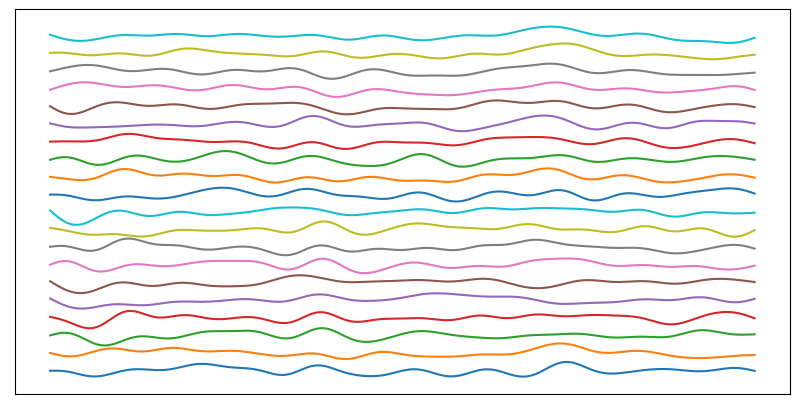

In [68]:
import numpy as np
max_val=np.maximum(np.max(aal_time_series),np.abs(np.min(aal_time_series)))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

# We only plot the first 20 regions time series
for i in range(20):
  plt.plot(aal_time_series[:,i]+i*max_val)

plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().xaxis.set_major_locator(plt.NullLocator())

**yeo7 atlas masker**

In [69]:
yeo7_masker = NiftiLabelsMasker(labels_img=yeo7_atlas_filename, t_r=0.72, standardize=True, low_pass=.1, high_pass=.01,
                           memory='nilearn_cache', verbose=5)

In [70]:
yeo7_time_series=yeo7_masker.fit_transform(fmri_filenames)
yeo7_time_series.shape

[NiftiLabelsMasker.fit_transform] loading data from /home/lzc/nilearn_data/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz
Resampling labels
[Memory]0.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


(168, 100)

# **Build and display a correlation matrix**

**Calculate the correlation matrix**

In [71]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([aal_time_series[:,:90]])[0]


**Display correlation matrix**

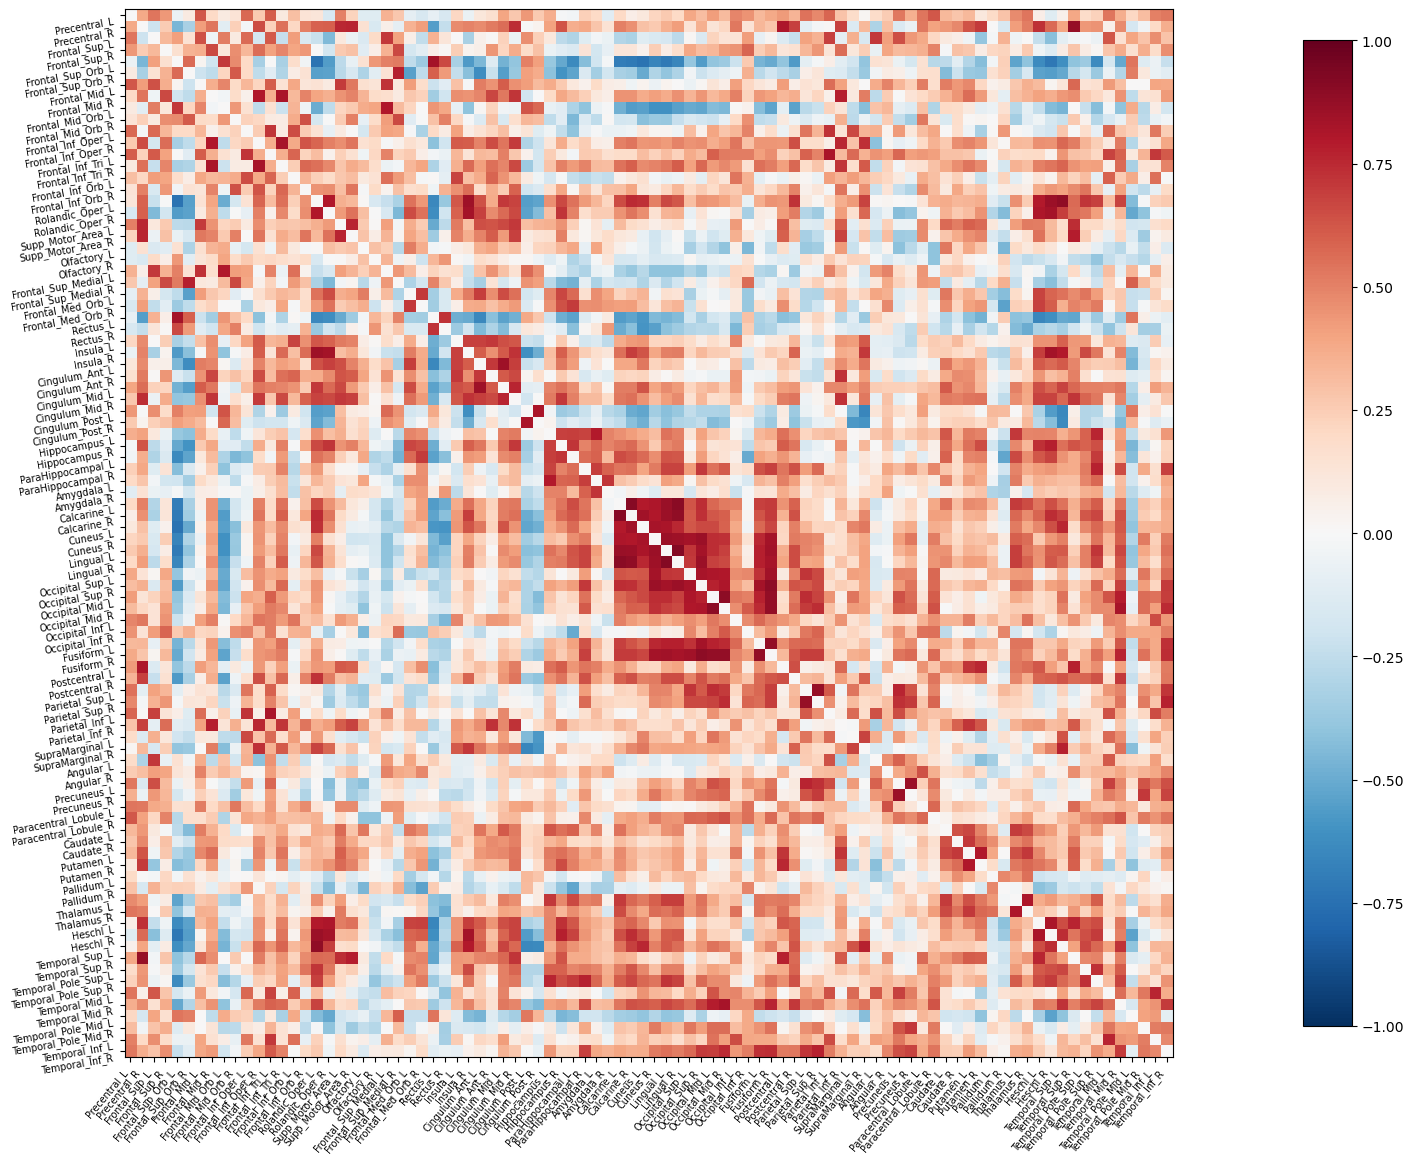

In [72]:
# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)

import matplotlib.pyplot as plt 
fig,ax=plt.subplots(1,1,figsize=(16,16))
plotting.plot_matrix(correlation_matrix, labels=aal_labels[:90], colorbar=True,
                     vmax=1.0, vmin=-1.0,axes=ax)

In [73]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([yeo7_time_series[:,:]])[0]

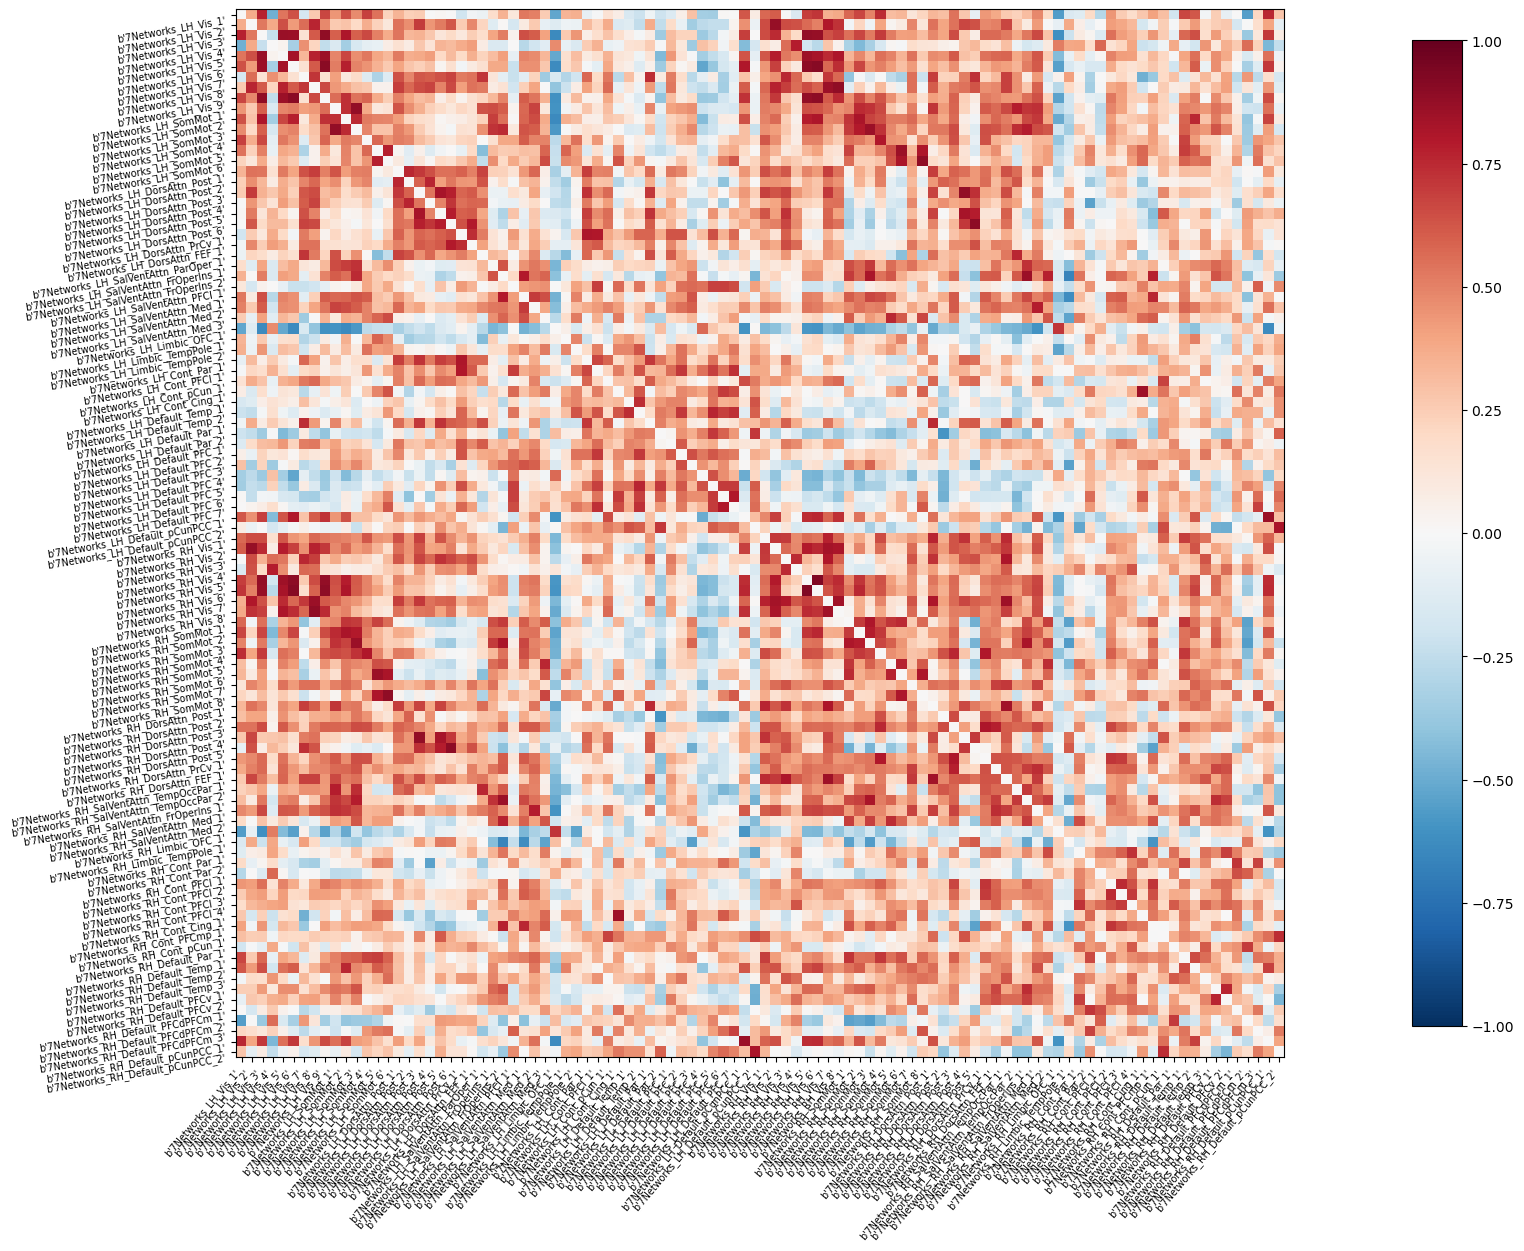

In [74]:
# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)

import matplotlib.pyplot as plt 
fig,ax=plt.subplots(1,1,figsize=(16,16))
plotting.plot_matrix(correlation_matrix, labels=yeo7_labels[:], colorbar=True, 
                     vmax=1.0, vmin=-1.0, axes=ax)